In [ ]:
# This notebook was adapted from here: https://www.kaggle.com/code/prashant111/knn-classifier-tutorial/notebook

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline


In [53]:
df = pd.read_csv("breast-cancer-wisconsin.data (1).txt")

In [54]:
df.shape

(699, 11)

We can see that there are 699 instances and 11 attributes in the data set.


In the dataset description, it is given that there are 10 attributes and 1 `Class` which is the target variable. So, we have 10 attributes and 1 target variable.

In [55]:
# preview the dataset

df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#Drop ID Column from the dataset

In [56]:
df = df.drop(['Id'], axis=1)


In [57]:
df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


# View Summary of Dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# The feature BareNuclei is actually numerical, and may need conversion.
* (The confusion happened because missing values are '?' in the original csv file, and this is not interpreted correctly by the csv reader as used above)

In [59]:
import pandas as pd
import numpy as np
df['Bare_Nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['Bare_Nuclei'], inplace=True)
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'])

<ipython-input-59-4fb442c5c97b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare_Nuclei'].replace('?', np.nan, inplace=True)


### Summary of variables


- There are 10 numerical variables in the dataset.


- All of the variables are of discrete type.


- Out of all the 10 variables, the first 9 variables are feature variables and last variable `Class` is the target variable.




## Print all numerical variables + total count of numerical columns

In [60]:
import numpy as np
import pandas as pd

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Variables:")
for col in numerical_cols:
  print(col)

print("\nTotal Count of Numerical Columns:", len(numerical_cols))


Numerical Variables:
Clump_thickness
Uniformity_Cell_Size
Uniformity_Cell_Shape
Marginal_Adhesion
Single_Epithelial_Cell_Size
Bare_Nuclei
Bland_Chromatin
Normal_Nucleoli
Mitoses
Class

Total Count of Numerical Columns: 10


### Missing values in variables

In [61]:
missing_values = df.isnull().sum()
print("Missing Values in Each Variable:")
missing_values

Missing Values in Each Variable:


,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


### check frequency distribution of target variable `Class`

In [62]:
df['Class'].value_counts()

,count
Class,
2,444
4,239


### check  percentage of frequency distribution of `Class`

In [72]:
class_percentage = (df['Class'].value_counts() / len(df)) * 100
print("Percentage of Frequency Distribution of Class:")
class_percentage

Percentage of Frequency Distribution of Class:


,count
Class,
2,65.007321
4,34.992679


We can see that the `Class` variable contains 2 class labels - `2` and `4`. `2` stands for benign and `4` stands for malignant cancer.

### Check the distribution of variables


Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed.

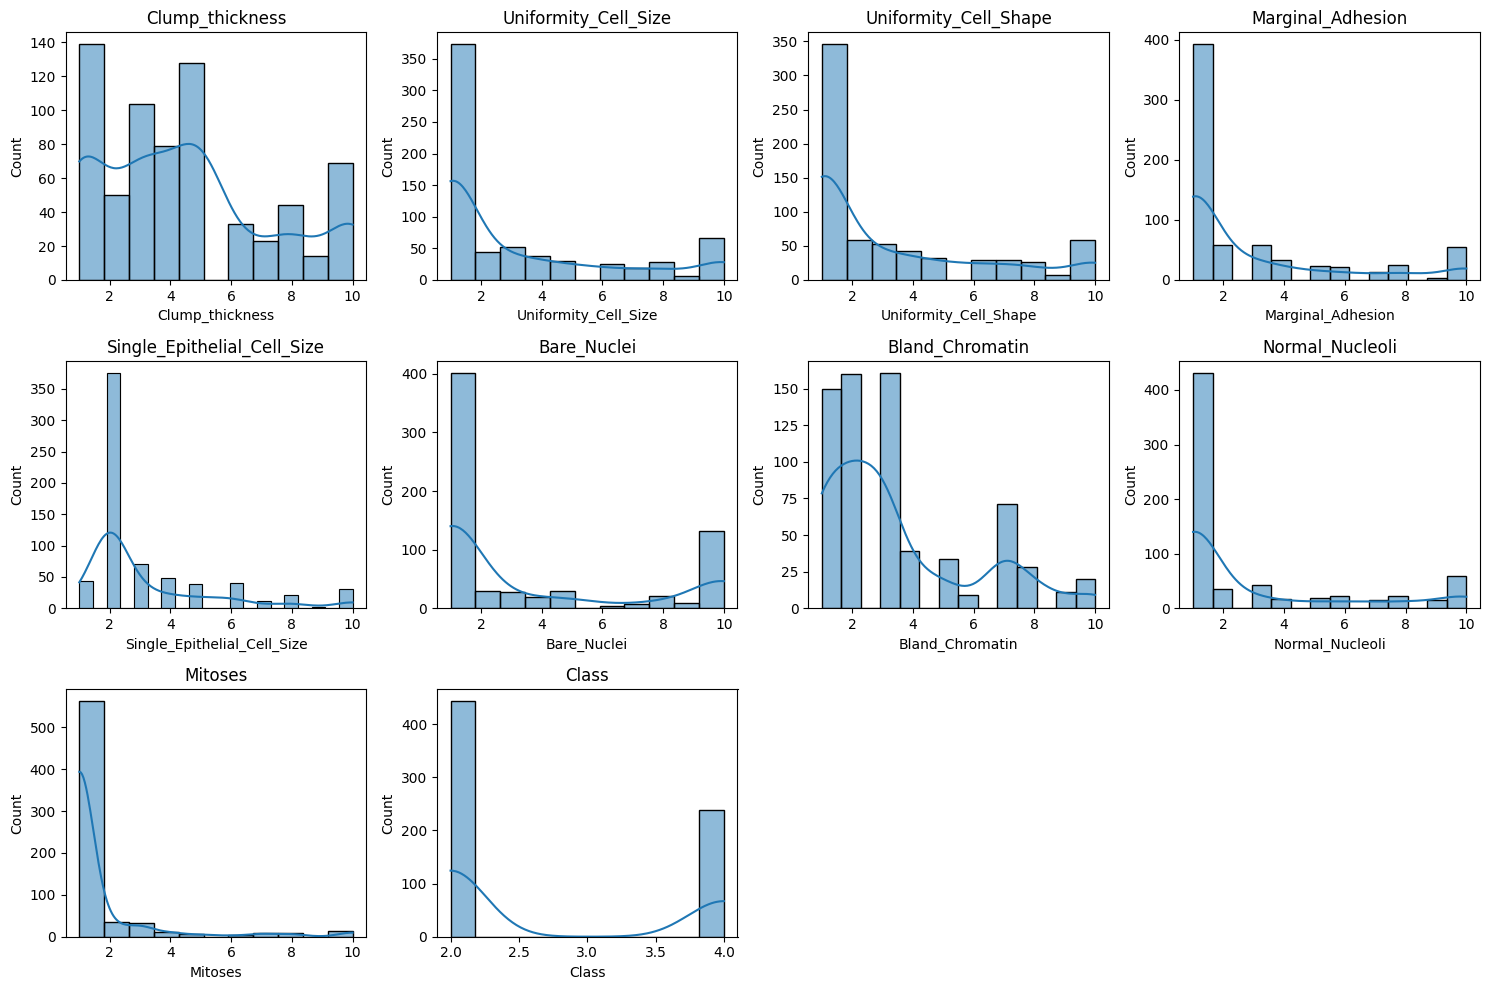

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 4, i + 1)
  sns.histplot(df[col], kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()

## Obtain X by removing the "Class" column from the data
* Store the "Class" column in y

In [65]:
X = df.drop('Class', axis=1)
y = df['Class']

## Split x and y into training and testing sets

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Impute missing values in X_train and X_test with respective column median
*  Make sure the median is taken from the train set (not test)

In [67]:
for column in X_train.columns:
  if X_train[column].isnull().any():
    median_value = X_train[column].median()
    X_train[column].fillna(median_value, inplace=True)
    X_test[column].fillna(median_value, inplace=True)

# Standard scale all features in X
* Make sure to fit the standard scaler to the training data
* Scale both train and test using the fitted standard scaler

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Import KNeighbors ClaSSifier from sklearn


In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)


knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [70]:
import numpy as np
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

training_error = np.mean(y_train_pred != y_train)
test_error = np.mean(y_test_pred != y_test)

print("Training error:", training_error)
print("Test error:", test_error)

Training error: 0.0
Test error: 0.058394160583941604


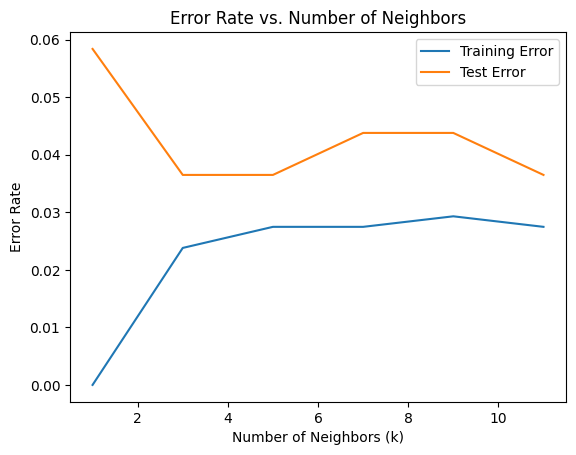

In [71]:
import matplotlib.pyplot as plt
import numpy as np

k_values = [1, 3, 5, 7, 9, 11]
training_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    training_error = np.mean(y_train_pred != y_train)
    test_error = np.mean(y_test_pred != y_test)
    training_errors.append(training_error)
    test_errors.append(test_error)

plt.plot(k_values, training_errors, label='Training Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Neighbors')
plt.legend()
plt.show()